In [13]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

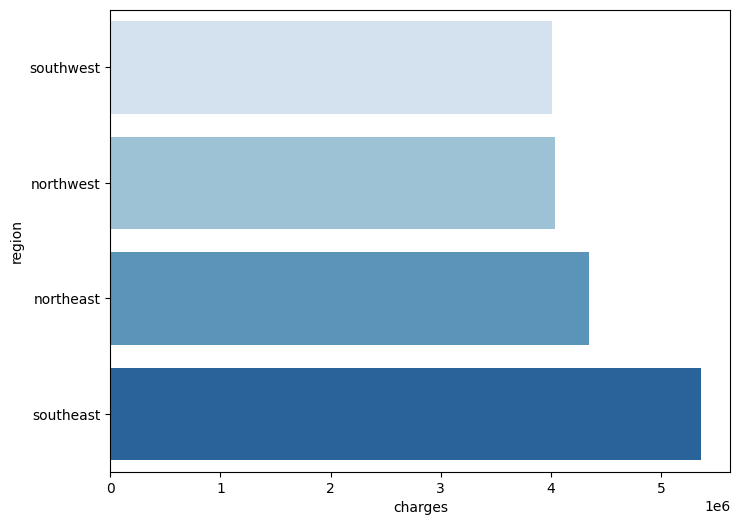

In [17]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1,figsize=(8,6)) 
ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')

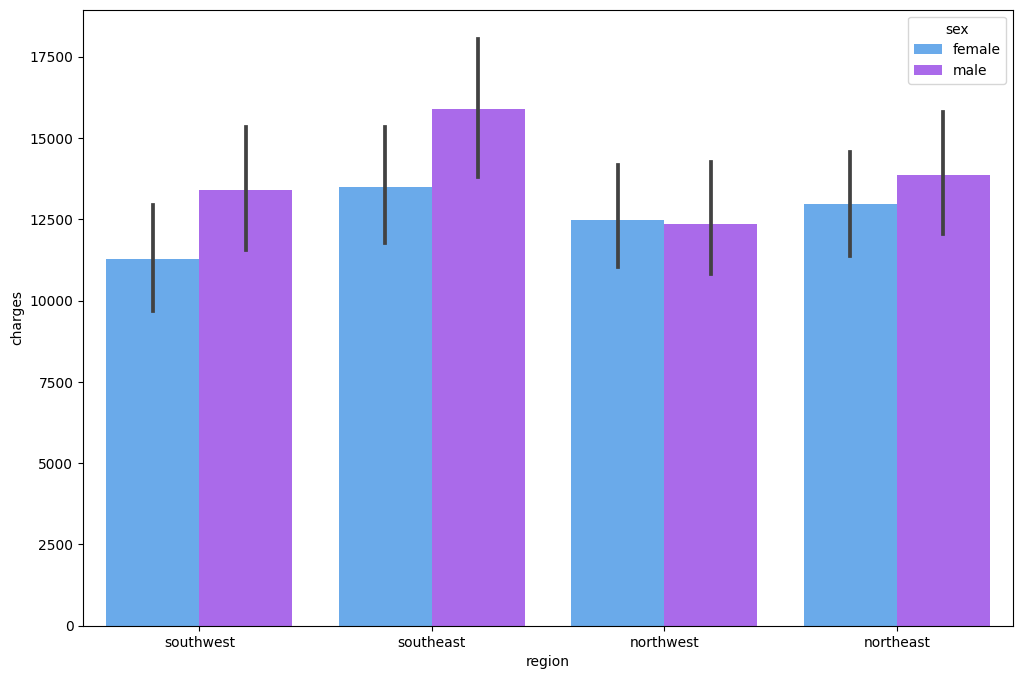

In [18]:
f, ax = plt.subplots(1,1,figsize=(12,8)) 
ax = sns.barplot(x= 'region', y= 'charges', hue= 'sex', data = df, palette ='cool')


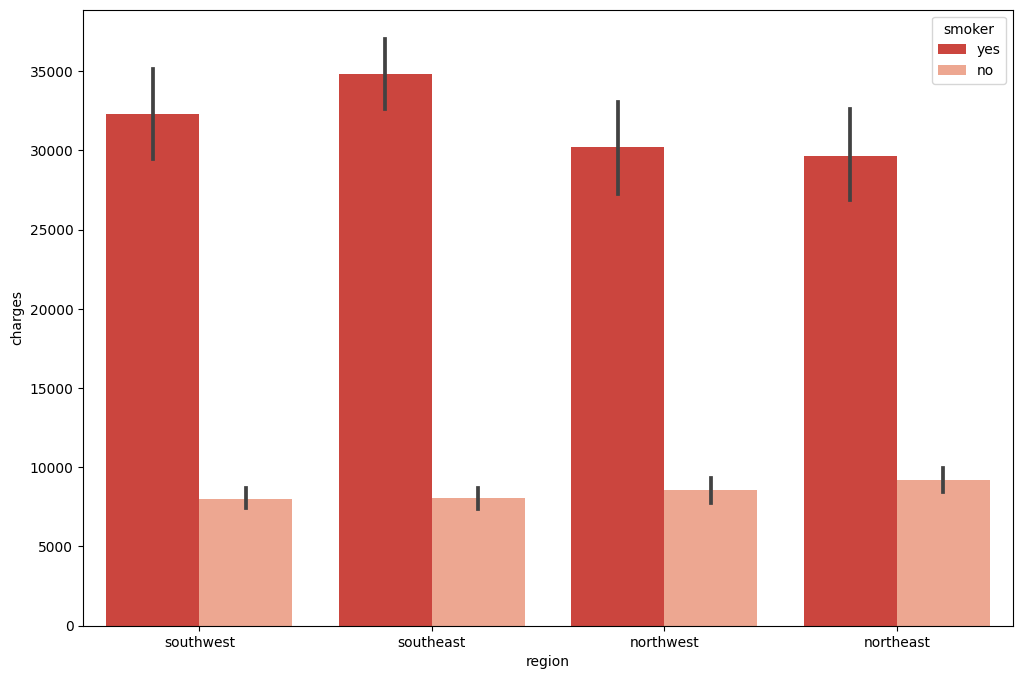

In [19]:
f, ax = plt.subplots(1,1,figsize=(12,8)) 
ax = sns.barplot(x= 'region', y= 'charges', hue= 'smoker', data = df, palette ='Reds_r')


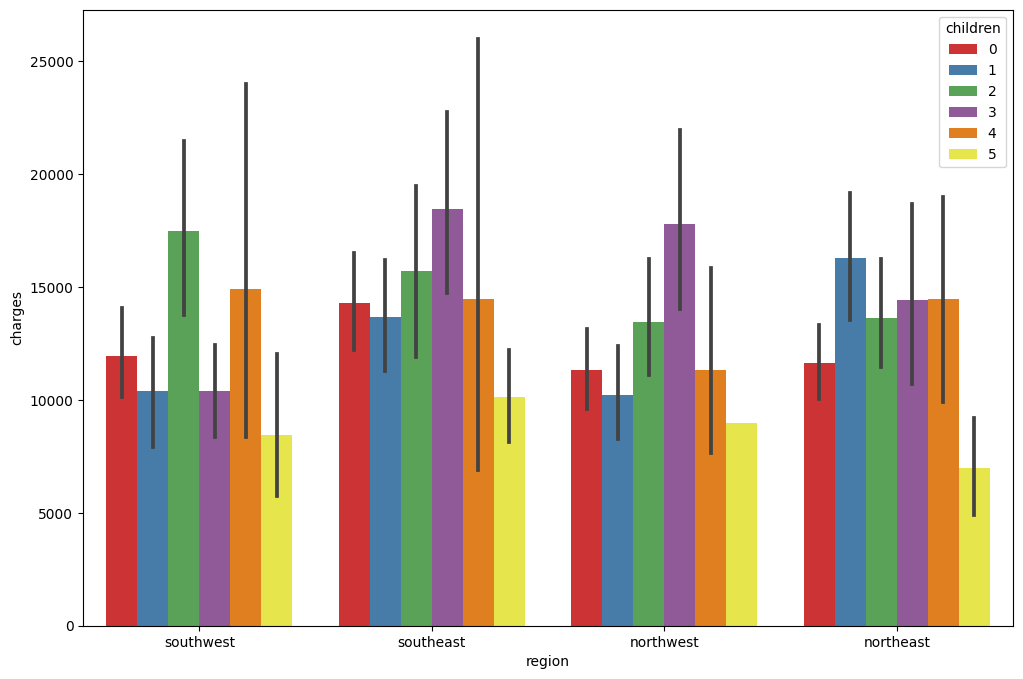

In [20]:
f, ax = plt.subplots(1,1,figsize=(12,8)) 
ax = sns.barplot(x= 'region', y= 'charges', hue= 'children', data = df, palette ='Set1')

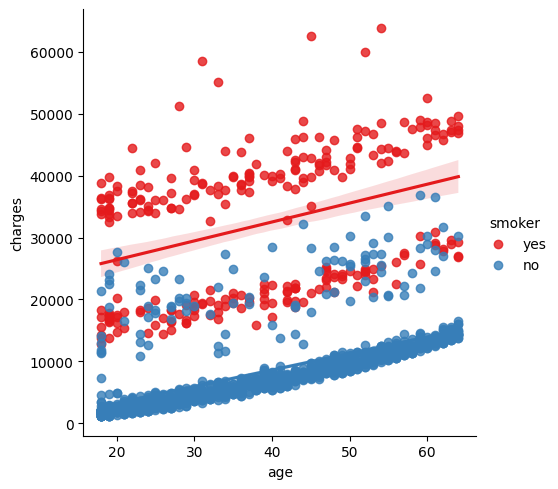

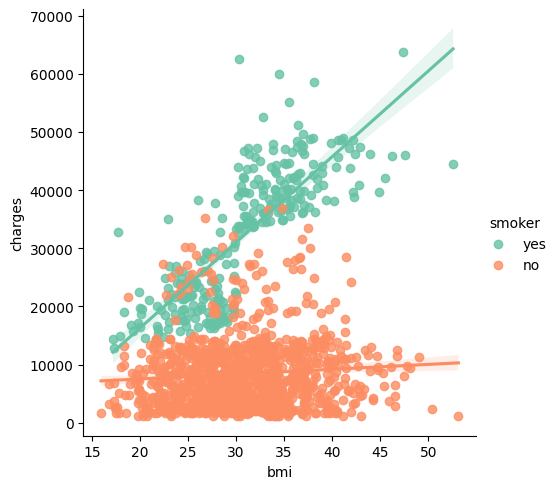

In [21]:
ax = sns.lmplot(x= 'age', y= 'charges', hue= 'smoker', data = df, palette ='Set1')
ax = sns.lmplot(x= 'bmi', y= 'charges', hue= 'smoker', data = df, palette ='Set2')

In [22]:
df[['sex','smoker','region']] = df[['sex','smoker','region']].astype('category')

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [24]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
x = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = holdout(x,y, test_size= 0.2, random_state=0)

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linear_reg.predict(X_test)

In [33]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.800
RMSE : 5643.220


In [34]:
importance = linear_reg.coef_
variables = ['age','sex','bmi','children','smoker','region']
for i, v in zip(variables,importance):
    print('Feature: %s, Score: %.5f'%(i,v))

Feature: age, Score: 253.99185
Feature: sex, Score: -24.32455
Feature: bmi, Score: 328.40262
Feature: children, Score: 443.72930
Feature: smoker, Score: 23568.87948
Feature: region, Score: -288.50857
